In [1]:
from libs.TrashbinDataset import TrashbinDataset
from libs.TDContainer import TDContainer
from libs.PretrainedModels import PretrainedModelsCreator, AlexNet_cc, SqueezeNet_cc, InceptionV3_cc
# from libs.Training import AverageValueMeter, trainval_classifier, test_classifier, accuracy_score
from libs.utils import get_model_name, import_dataset

In [2]:
from torchvision import datasets, models, transforms
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import os
import copy
from torch import nn

In [3]:
def init_model(creator: PretrainedModelsCreator, model_name: str, num_classes: int = 3, feature_extract: bool=True, use_pretrained: bool = True):
    print('Init: %s' % (model_name))
    creator.init_model(num_classes=num_classes, feature_extract=feature_extract, use_pretrained=use_pretrained)
    # creator.get_info()
    return creator


In [4]:
# omit num_classes 
alexNet_v1 = init_model(creator=AlexNet_cc(), model_name=get_model_name(model_name='AlexNet', lr='0.01'), feature_extract=True, use_pretrained=True)

Init: AlexNet__lr=0.01


In [ ]:
# type(alexNet_v1)
# alexNet_v1.get_info()

## Test initialize model SqueezeNet, InceptionV3

In [5]:
squeezenet_v1 = init_model(creator=SqueezeNet_cc(), model_name=get_model_name(model_name='SqueezeNet', lr='0.01'), feature_extract=True, use_pretrained=True)

Init: SqueezeNet__lr=0.01


In [ ]:
init_model(creator=InceptionV3_cc(), model_name=get_model_name(model_name='InceptionV3', lr='0.01'), feature_extract=True, use_pretrained=True)

## Test using dataset (dataLoader)

In [6]:
dst_v0 = import_dataset('dataset', 
    train_transform=transforms.Compose([
        transforms.Resize(256),
        # transforms.AutoAugment(transforms.AutoAugmentPolicy.IMAGENET),
        transforms.RandomCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])     # default dev and std for pretrained models
    ]),
    test_transform=transforms.Compose([
        transforms.Resize(256), 
        transforms.CenterCrop(224), # crop centrale
        # transforms.AutoAugment(transforms.AutoAugmentPolicy.SVHN), # NOTA: già su dataset_v2 è stato settato sul train
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])     # default dev and std for pretrained models
    ])
)

initialize dataset on PretrainedModel object

In [8]:
dst_v0.create_data_loader(batch_size=64, num_workers=2, drop_last=True)

Show dataLoaders images:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Feature batch shape: torch.Size([64, 3, 224, 224])
Labels batch shape: torch.Size([64])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


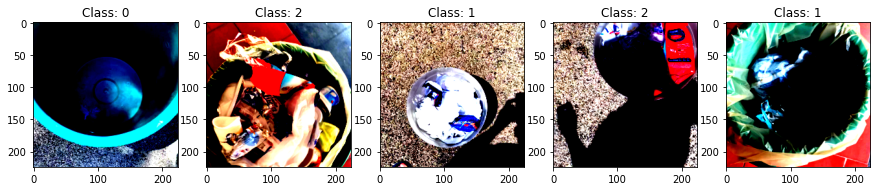

In [9]:
train_dataloader = dst_v0.training_loader

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

plt.figure(figsize=(15,8))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.title("Class: %s" % train_labels[0].numpy())
    img = train_features[0].squeeze()
    label = train_labels[0]

    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))
    train_features, train_labels = next(iter(train_dataloader))
plt.show()

## Create the optimizer -- todo
https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html

In [10]:
model_ft = squeezenet_v1.get_model()    # testo con quello presente sull esempio per vedere se ho fatto bene

device = "cuda" if torch.cuda.is_available() else "cpu"

# Send the model to GPU
model_ft = model_ft.to(device) ## da integrareee

#### da integrare nella classe principale

# Gather the parameters to be optimized/updated in this run. If we are
#  finetuning we will be updating all parameters. However, if we are
#  doing feature extract method, we will only update the parameters
#  that we have just initialized, i.e. the parameters with requires_grad
#  is True.
params_to_update = model_ft.parameters()
print("Params to learn:")

feature_extract = True

if feature_extract:
    params_to_update = []
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(params_to_update, lr=0.001, momentum=0.9)

Params to learn:
	 classifier.1.weight
	 classifier.1.bias


## TO DO INTERAMENTE

- run training e validation step (il codice di training)
- adatta a quella precedente
- inserisci il codice precedente 


In [11]:
from libs.Training2 import train_model_adapted

In [12]:
# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Train and evaluate
model_ft, hist = train_model_adapted(model_ft, dst_v0, criterion, optimizer_ft, num_epochs=1, is_inception=False)   # sto testando squeezenet

Epoch 0/0
----------
SONO NELL'ELSE E LA PHASE e'... train
SONO NELL'ELSE E LA PHASE e'... train
SONO NELL'ELSE E LA PHASE e'... train
SONO NELL'ELSE E LA PHASE e'... train
SONO NELL'ELSE E LA PHASE e'... train
SONO NELL'ELSE E LA PHASE e'... train
SONO NELL'ELSE E LA PHASE e'... train
SONO NELL'ELSE E LA PHASE e'... train
SONO NELL'ELSE E LA PHASE e'... train


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/daniloleocata/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-626de2ca3da1>", line 5, in <module>
    model_ft, hist = train_model_adapted(model_ft, dst_v0, criterion, optimizer_ft, num_epochs=1, is_inception=False)   # sto testando squeezenet
  File "/Users/daniloleocata/Documents/GitHub/trashbin-classifier/libs/Training2.py", line 71, in train_model_adapted
    outputs = model(inputs)
  File "/usr/local/lib/python3.9/site-packages/torch/nn/modules/module.py", line 889, in _call_impl
    result = self.forward(*input, **kwargs)
  File "/usr/local/lib/python3.9/site-packages/torchvision/models/squeezenet.py", line 110, in forward
    x = self.features(x)
  File "/usr/local/lib/python3.9/site-packages/torch/nn/modules/module.py", line 889, in _call_impl
    result = self.forward(*input, **kwargs)
  File "/u

TypeError: object of type 'NoneType' has no len()